In [1]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean, mode
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Data import

In [2]:
iris = sns.load_dataset('iris')

# Data Exploration

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


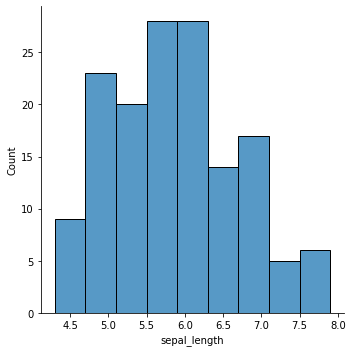

In [4]:
sns.displot(iris, x="sepal_length")
plt.savefig("sepal-length-distribution.png")

The sepal length variable is normally distributed, with a range that goes from 4.5 to 8.0.
The mean is approximately 6.

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


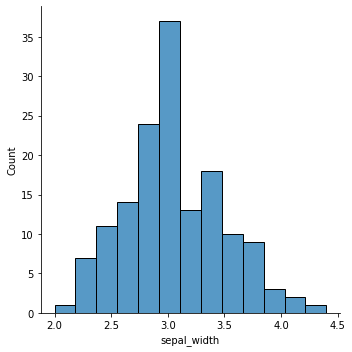

In [5]:
sns.displot(iris, x="sepal_width")
plt.savefig("sepal-width-distribution.png")

The sepal width variable is normally distributed, with a range that goes from 2.9 to 4.5, and a spike at the value 3.0. 
The mean is approximately 3.0.

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


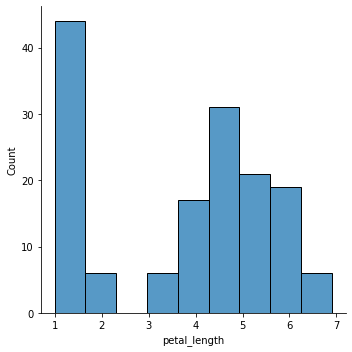

In [6]:
sns.displot(iris, x="petal_length")
plt.savefig("petal-length-distribution.png")

The Petal length variable is split in two parts, as there is a gap of values between the two sides. The right side is normally distributed, while the left side is composed of only two values. 
The range of the left side goes from 1 to 2, while the right side goes from 3 to 7, with no observations between 2 and 3. 

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


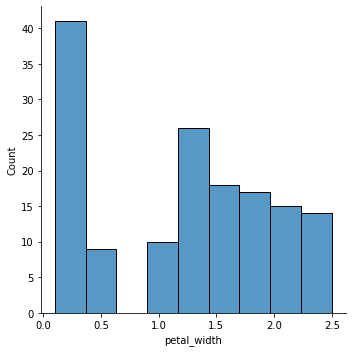

In [7]:
sns.displot(iris, x="petal_width")
plt.savefig("petal-width-distribution.png")

The Petal width variable is split in two parts, as there is a gap of values between the two sides. The right side is normally distributed with a skew to the left, while the left side is composed of only two values. 
The range of the left side goes from 0 to 0.5, while the right side goes from 1 to 2.5.

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


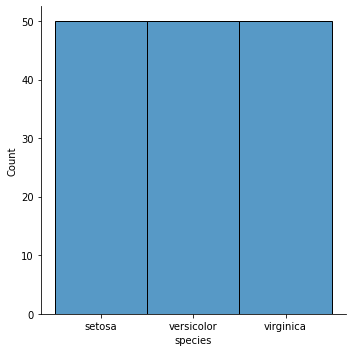

In [8]:
sns.displot(iris, x="species")

It can be observed that the observations in the dataset are split equally in three species: setosa, versicolor, and virginica

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


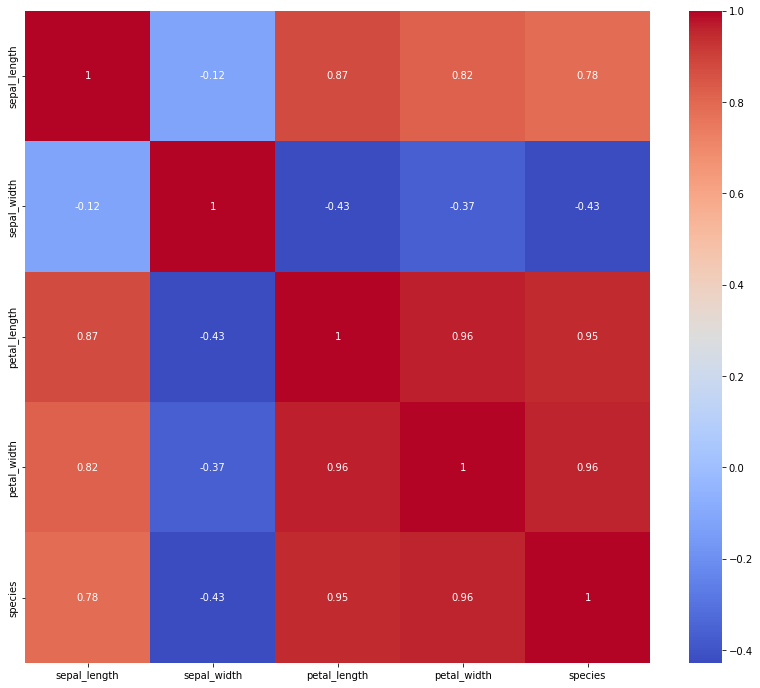

In [9]:
# Compute correlation matrix
iris2 = iris.copy()

# convert species (catagorical) to numerical
# This will be done in a temporary dataset, as the actual dataset will be transformed with one-hot encoding
le = LabelEncoder().fit(iris2['species'])
iris2['species'] = le.transform(iris2['species'])

# species has been converted to numerical values
# Create a value map for reference
map = list(le.inverse_transform(iris2['species']))
mapDict = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapDict)

correlation_matrix = iris2.corr()

# Generate a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig("Correlation Matrix.png")
plt.show()
del(iris2)

With the heatmap, it can be seen that: 
* Petal width and length are heavily related
* Petal width and length are heavily related to the species
* Sepal length is decently related to every variable and label, except for sepal width
* Sepal width is inversely related to every variable and label, except for sepal length

In [10]:
for col in iris.drop(["species"], axis=1).columns:
    print("Col: {}\tMin: {}\tMean: {}\tMax: {}\tMode: {}\n".format(col, min(iris[col]), mean(iris[col]), max(iris[col]),mode(iris[col])))

Col: sepal_length	Min: 4.3	Mean: 5.843333333333334	Max: 7.9	Mode: 5.0

Col: sepal_width	Min: 2.0	Mean: 3.0573333333333332	Max: 4.4	Mode: 3.0

Col: petal_length	Min: 1.0	Mean: 3.758	Max: 6.9	Mode: 1.4

Col: petal_width	Min: 0.1	Mean: 1.1993333333333334	Max: 2.5	Mode: 0.2



# Classification algorithms

In [11]:
x_encoded = iris.drop(["species"], axis=1).copy()
y_encoded = iris["species"].copy()

In [12]:
y_encoded = pd.get_dummies(y_encoded, drop_first = True)
y_encoded["setosa"] = np.where((y_encoded["virginica"] == False) & 
                                (y_encoded["versicolor"] == False), True, False)
y_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   versicolor  150 non-null    bool 
 1   virginica   150 non-null    bool 
 2   setosa      150 non-null    bool 
dtypes: bool(3)
memory usage: 578.0 bytes


In [13]:
print(y_encoded.head())
y_encoded.value_counts()

   versicolor  virginica  setosa
0       False      False    True
1       False      False    True
2       False      False    True
3       False      False    True
4       False      False    True


versicolor  virginica  setosa
False       False      True      50
            True       False     50
True        False      False     50
Name: count, dtype: int64

## Naive Bayes (Gaussian)

In [14]:
clf = GaussianNB()

In [15]:
# convert species (catagorical) to numerical
# This will be done in a temporary dataset, as the actual dataset will be transformed with one-hot encoding
le = LabelEncoder().fit(iris['species'])
y = le.transform(iris['species'])
map = list(le.inverse_transform(y))
mapDict = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapDict)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [16]:
clf.fit(x_encoded, y)

GaussianNB()

In [17]:
pred_res = clf.predict(x_encoded)
comparison = pred_res == y
print(comparison)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [18]:
conf_mat = confusion_matrix(y, pred_res)
print(conf_mat)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


It can be seen that:
* Every setosa observation was classified correctly
* 47 out of 50 virginica observations were classified correctly, with only 3 incorrectly classified
* 47 out of 50 versicolor observations were classified correctly, with only 3 incorrectly classified

## KNN (K nearest neighbors)

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.fit(x_encoded, y_encoded)

KNeighborsClassifier(n_neighbors=3)

In [21]:
pred_res = knn.predict(x_encoded)
comparison = pred_res == y_encoded
print(comparison.head())

   versicolor  virginica  setosa
0        True       True    True
1        True       True    True
2        True       True    True
3        True       True    True
4        True       True    True


In [22]:
print(comparison.value_counts())
print(comparison.setosa.value_counts())

versicolor  virginica  setosa
True        True       True      144
False       False      True        6
Name: count, dtype: int64
setosa
True    150
Name: count, dtype: int64


The results for KNN are very similar to those obtained through Naive Bayes, if not exactly the same. 
* Every setosa observation was classified correctly
* 47 out of 50 virginica observations were classified correctly, with only 3 incorrectly classified
* 47 out of 50 versicolor observations were classified correctly, with only 3 incorrectly classified

## Decision Tree

In [23]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [24]:
dtc.fit(x_encoded, y_encoded)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [25]:
pred_res = dtc.predict(x_encoded)
comparison = pred_res == y_encoded
print(comparison.head())

   versicolor  virginica  setosa
0        True       True    True
1        True       True    True
2        True       True    True
3        True       True    True
4        True       True    True


In [26]:
print(comparison.value_counts())
print(comparison.setosa.value_counts())
print(comparison.virginica.value_counts())
print(comparison.versicolor.value_counts())

versicolor  virginica  setosa
True        True       True      150
Name: count, dtype: int64
setosa
True    150
Name: count, dtype: int64
virginica
True    150
Name: count, dtype: int64
versicolor
True    150
Name: count, dtype: int64


It can be seen that very single observation was correctly predicted. 
This is the best classification algorithm so far. 

## Logistic Regression

In [27]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')#, max_iter=1000)

In [28]:
y_logreg = y_encoded.idxmax(1)
logreg.fit(x_encoded, y_logreg)

/mnt/c/Users/rino2/OneDrive/Documentos/Maestria/Fourth Quarter - Summer 2023/Data Science Tools 1/DataScienceTools1/dst1_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [29]:
pred = logreg.predict(x_encoded)

In [30]:
comparison = pred == y_logreg
res = pd.DataFrame()
res["comparison"] = comparison

In [31]:
res.comparison.value_counts()

comparison
True     146
False      4
Name: count, dtype: int64

It can be seen that there were a total of 4 errors in the predictions. 

In [32]:
for a in pred:
    print(a)

setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
virginica
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
virginica
versicolor
versicolor
versicolor
versicolor
versicolor
virginica
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
versicolor
virginica
virginica
virginica
virginica
virginica
virginica
versicolor
virginica
virginica
virginica
vi

Above shows that there were 3 errors when predicting versicolor, which were predicted wrongly as virginica. 
There was one error when predicting virginica, which was wrongly predicted as versicolor.

## Random Forest

In [33]:
clf = RandomForestClassifier(random_state=0)

In [34]:
clf.fit(x_encoded, y_encoded)

RandomForestClassifier(random_state=0)

In [35]:
predicted = clf.predict(x_encoded)
print(predicted)

[[False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False  True]
 [False False

In [36]:
comparison = predicted == y_encoded
comparison.value_counts()

versicolor  virginica  setosa
True        True       True      150
Name: count, dtype: int64

It can be seen that every observation was correctly predicted. 
This is probably because Random Forest uses Decision Trees as elements, which would imply results at least as good as an individual decision tree, and probably better. 

In [37]:
feature_importance = clf.feature_importances_
feature_names = clf.feature_names_in_
relevance = sorted(zip(feature_importance,feature_names), reverse=True)
for f in relevance:
    print(f)

(0.46044473961715215, 'petal_length')
(0.42411626512710127, 'petal_width')
(0.09090795402103084, 'sepal_length')
(0.024531041234715754, 'sepal_width')


It can be observed that the two most relevant features for the prediction of the species are the petal length and the petal width. 
The features sepal length and sepal width are almost irrelevant for the prediction. 
Let us see what happens if these two are removed

In [38]:
x_encoded_temp = x_encoded.drop(["sepal_length", "sepal_width"], axis=1)
x_encoded_temp

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [39]:
clf.fit(x_encoded_temp, y_encoded)
predicted = clf.predict(x_encoded_temp)
comparison = predicted == y_encoded
comparison.value_counts()

versicolor  virginica  setosa
True        True       True      149
False       False      True        1
Name: count, dtype: int64

It can be observed that, after dropping the two irrelevant features, the observations were predicted correctly 149 out of 150 times. 
This means that the performance of the model dropped slightly, but the complexity dropped by half. 